### Système de Scoring de Solvabilité et Prédiction d’Approbation de Prêts


In [4]:
#Import des packages
import pandas as pd
import numpy as np 
import  matplotlib.pyplot as plt
import seaborn as sns
import pickle


## 1. EDA : Exploratory Data Analysis

In [5]:
#Lecture de la base de donnée la base de donnée
data=pd.read_csv("train.csv")
df=data.copy()

###  Analyse de la forme
1. La variable target: Loan_Status
2. Nombre de lignes et de colonnes : (614, 13)
3. Types de variables :
Quantitatives: 8
Qualitative: 5
7. Valeurs manquantes:
Très peu de variables manquantes (toutes inférieur à 8%)

In [6]:
# Configure pandas pour afficher jusqu'à  lignes complètes dans la sortie (par défaut, il coupe après quelques lignes)
pd.set_option("display.max_row", df.shape[0]+1)


In [7]:
#Afficher les 5 première lignes 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#La taille du dataset
df.shape

(614, 13)

In [9]:
#Les types de variables
df.dtypes.value_counts()

object     8
float64    4
int64      1
Name: count, dtype: int64

<Axes: ylabel='count'>

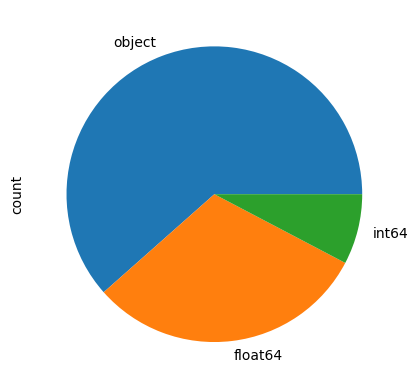

In [10]:
df.dtypes.value_counts().plot.pie()

In [11]:
#Valeur manquantes
(df.isnull().sum()/df.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<Axes: >

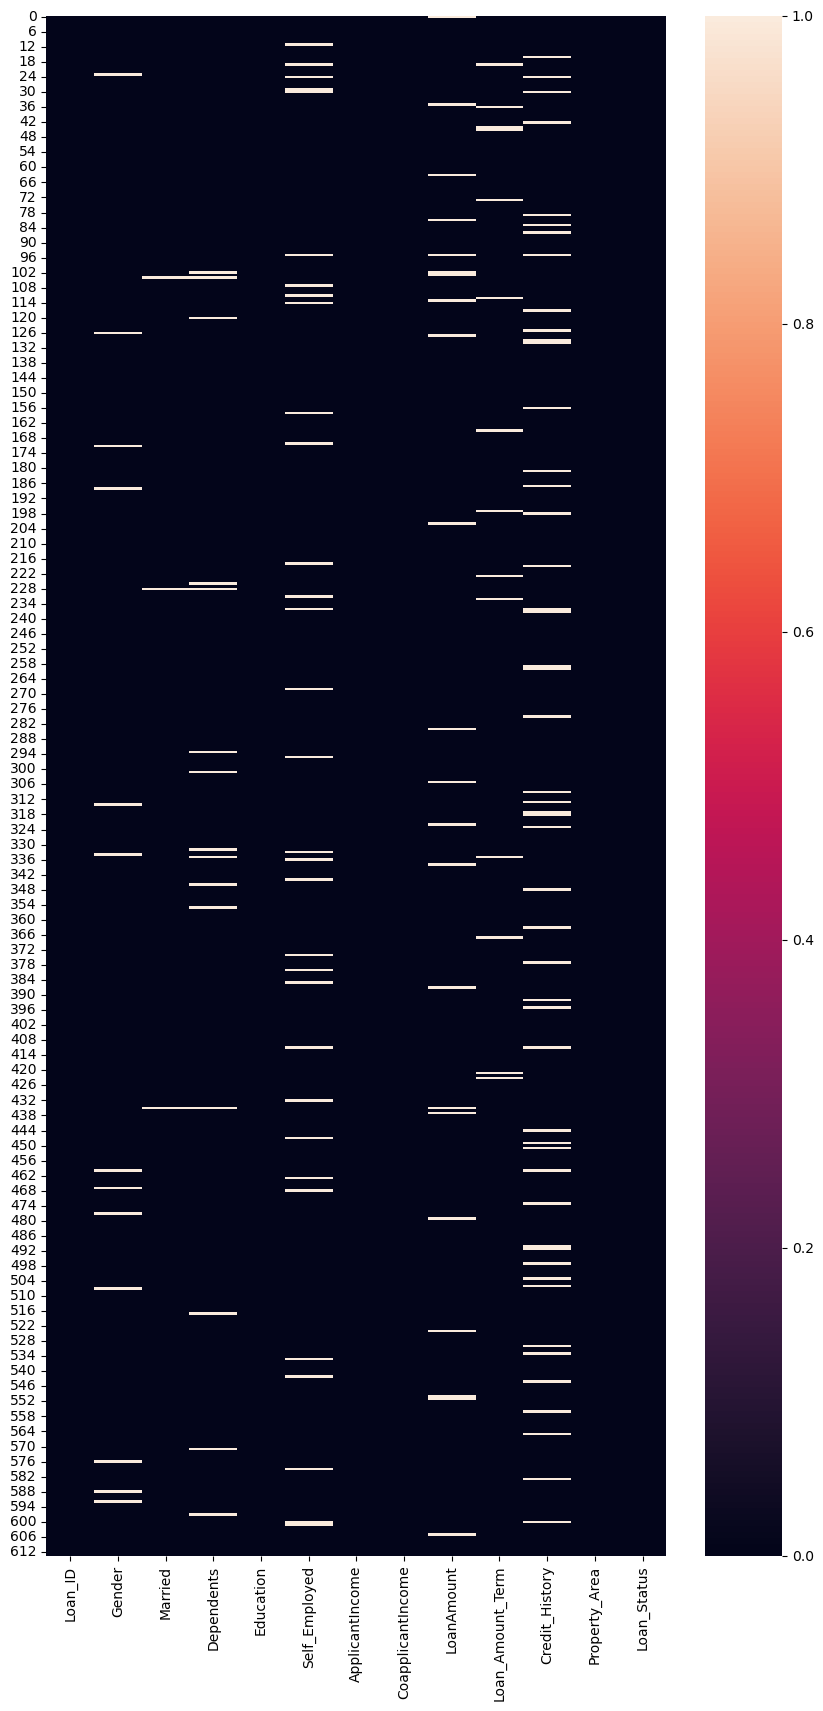

In [12]:
#Valeur manquantes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 20))
sns.heatmap(df.isna())

In [13]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Loan_ID              0.000000
CoapplicantIncome    0.000000
ApplicantIncome      0.000000
Education            0.000000
Loan_Status          0.000000
Property_Area        0.000000
Married              0.004886
Gender               0.021173
Loan_Amount_Term     0.022801
Dependents           0.024430
LoanAmount           0.035831
Self_Employed        0.052117
Credit_History       0.081433
dtype: float64

In [14]:
missing_pourcentage=df.isna().sum()/df.shape[0]
missing_pourcentage[(df.isna().sum()/df.shape[0])>0]

Gender              0.021173
Married             0.004886
Dependents          0.024430
Self_Employed       0.052117
LoanAmount          0.035831
Loan_Amount_Term    0.022801
Credit_History      0.081433
dtype: float64

### Analyse du fond
1. Visualisation de la variable target:  Notre dataset est déséquilibré

2. Signification des variables:


La distribution des variables catégorielles montre que la majorité des emprunteurs sont mariés, de sexe masculin, résident en zone urbaine ou semi-urbaine, ne sont pas travailleurs indépendants, sont diplômés et n’ont aucune personne à charge. La variable Loan_Status présente un déséquilibre avec une proportion plus élevée d'approbations de prêts, ce qui peut influencer la performance des modèles de classification. Ces distributions justifient l’imputation par le mode pour les variables catégorielles présentant des valeurs manquantes.

3. Relation variables
- Catégorielle/Target
  
L’analyse graphique des variables catégorielles montre que certains profils d’emprunteurs présentent une probabilité plus élevée d’obtenir un prêt. En particulier, les hommes et les personnes sans dépendants constituent la majorité des demandes de prêt et affichent les taux d’approbation les plus élevés. Toutefois, la comparaison des proportions suggère que le genre n’est pas un facteur déterminant dans la décision d’octroi, contrairement à la charge familiale : on observe une diminution progressive des acceptations lorsque le nombre de personnes à charge augmente, indiquant un impact potentiel sur la capacité de remboursement perçue par les institutions financières.

De plus, les emprunteurs non indépendants, diplômés, et résidant en zone urbaine, rurale ou semi-urbaine présentent des tendances similaires, avec davantage d’approbations que de refus. Cette constance dans les distributions montre que ces caractéristiques socio-démographiques exercent un impact limité sur la décision finale.

Ces observations permettent ainsi d’identifier les variables susceptibles d’influencer la décision d’octroi et d’orienter la sélection des caractéristiques pertinentes pour la modélisation, en mettant en évidence l’importance de facteurs liés à la stabilité financière et à la capacité de remboursement.

- Numérique/Target


In [15]:
#Visualisation de la variable target
df["Loan_Status"].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

In [16]:
#Histogramme des variables des variables continues
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
### Signification des variab

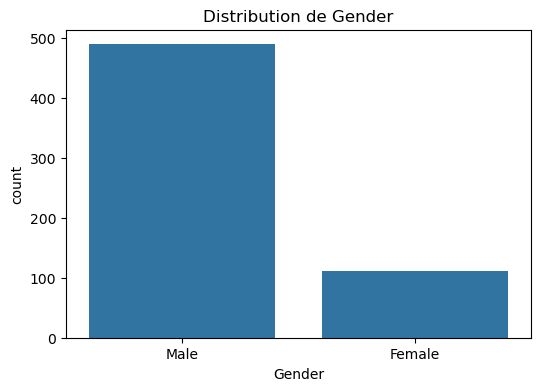

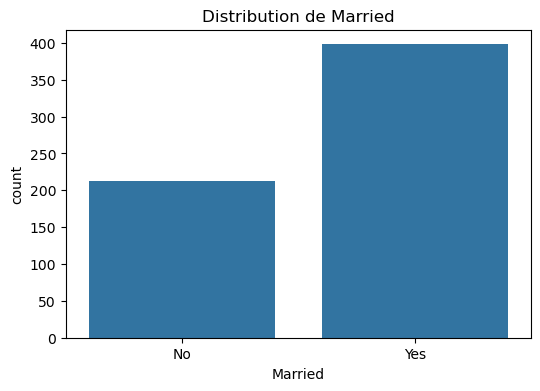

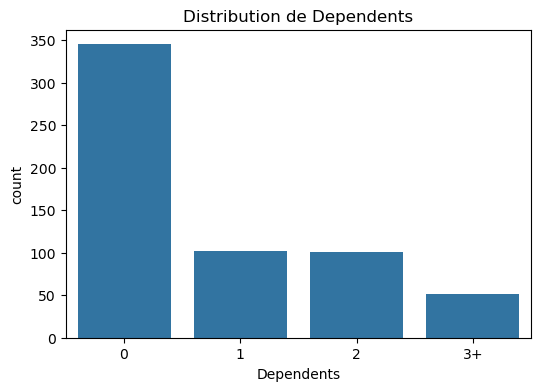

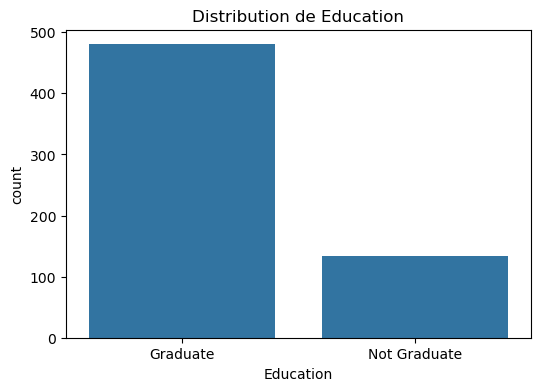

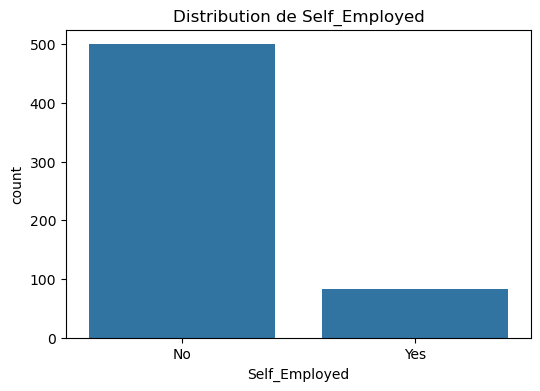

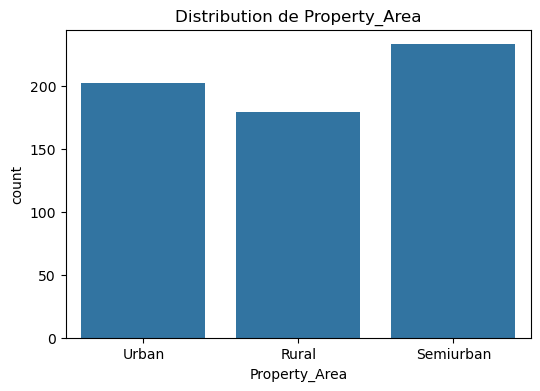

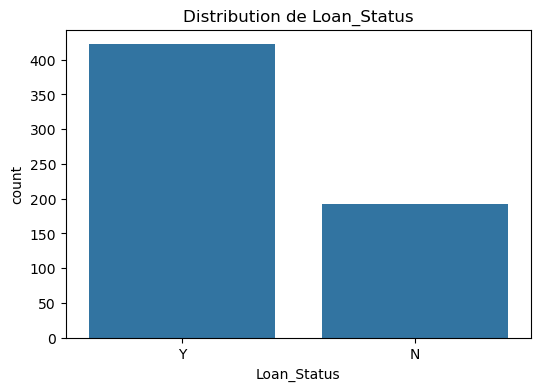

In [17]:
categorical_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution de {col}")
    plt.show()

### Relation avec la cible

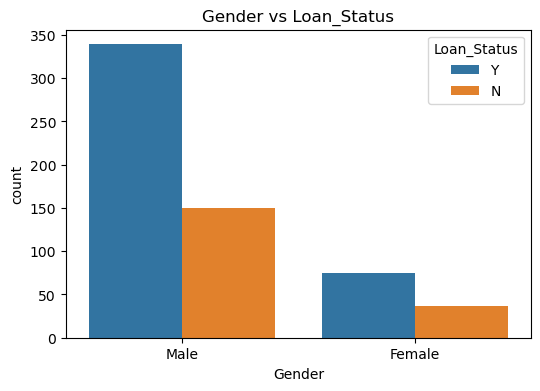

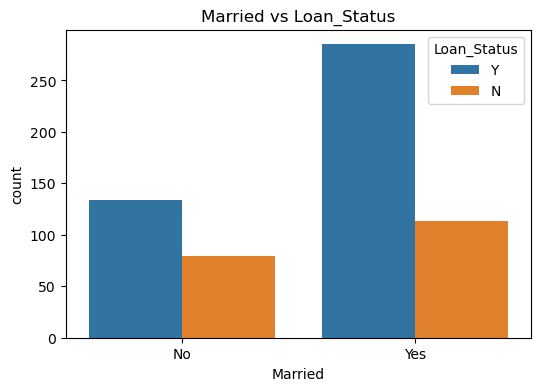

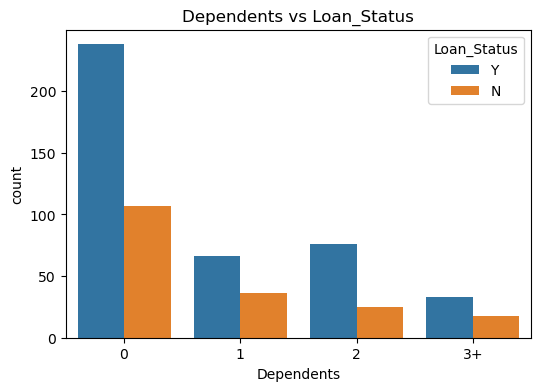

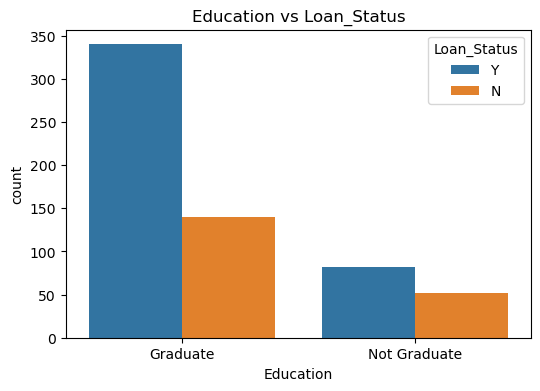

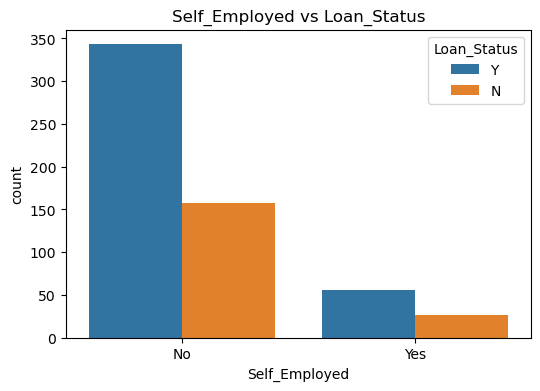

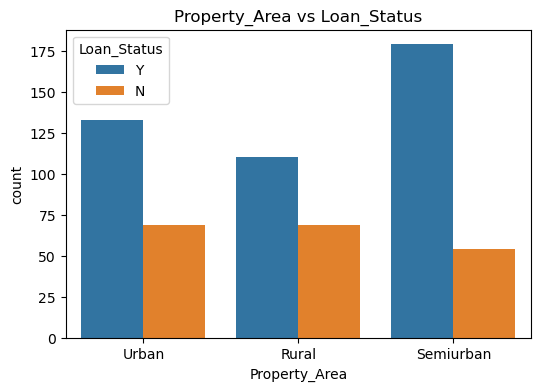

In [18]:
# Relation variables catégorielles/ Target
for col in categorical_cols[:-1]:  # exclure Loan_Status
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f"{col} vs Loan_Status")
    plt.show()